In [1]:
from glob import glob
import rasterio as rio
import os
import geopandas as gpd
import numpy as np
from rasterio.warp import reproject, Resampling

In [2]:
#libraries for plotting maps
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from rasterio.plot import plotting_extent
import contextily as ctx
import random
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
pac_dir = 'X:/data/pacific'
out_dir = os.path.join(pac_dir, 'temp')

In [4]:
pac_path = r'C:\Users\wb514197\WBG\EEAPV Pacific Observatory Files - Geospatial and Big Data\Data\Admin Boundaries'
pac_adm0 = gpd.read_file(os.path.join(pac_path, "Adm0_Pacific.shp"))

In [5]:
sel = [
    'Federated States of Micronesia', 
    'Fiji',
    'Kiribati',
    'Marshall Islands',
    'Nauru',
    'Palau',
    'Papua New Guinea',
    'Samoa',
    'Solomon Islands',
    'Tonga',
    'Tuvalu',
    'Vanuatu'
]

In [6]:
len(sel)

12

In [172]:
pac = pac_adm0.loc[pac_adm0.WB_ADM0_NA.isin(sel)].copy()

In [173]:
# pac = pac.to_crs("EPSG:4326")
pac = pac.to_crs("EPSG:9191")

In [101]:
for idx, row in pac.iterrows():
    print(idx)

3
10
11
12
14
19
21
23
24
26
27
28


In [102]:
row.ISO3

'VUT'

In [103]:
files = glob(out_dir+f"/{row.ISO3}*.tif")

In [104]:
data_rio = rio.open(files[0])
data = data_rio.read(1)

In [106]:
data[data==-1] = np.nan

In [108]:
gdf = gpd.GeoDataFrame([row], crs=pac.crs)

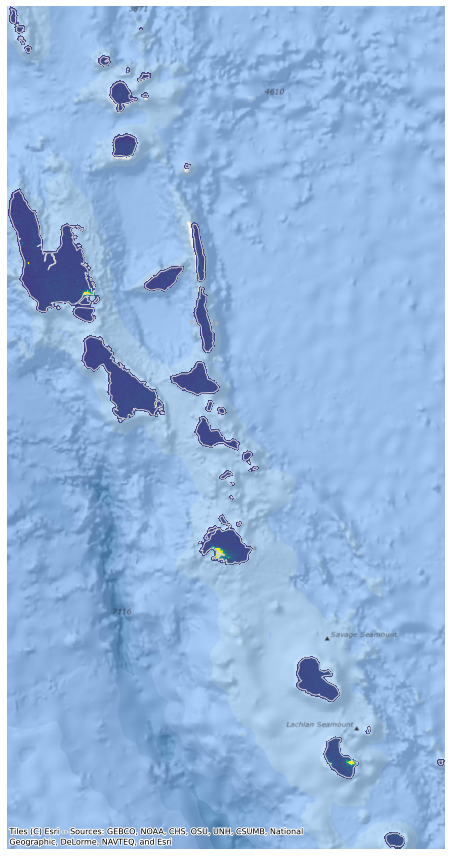

In [122]:
figsize = (12,12)
fig, ax = plt.subplots(1, 1,  figsize = figsize)
ax.set_title("", fontsize=16)
plt.axis('off')

ext = plotting_extent(data_rio)
im = ax.imshow(data, cmap='viridis', vmin=0, vmax=1, extent=ext) # norm=colors.PowerNorm(gamma=0.3) extent=ext
gdf.plot(ax=ax, facecolor='none', edgecolor='lightgray') # markersize=50, alpha=1


# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size="3%", pad=0.25)
# cb = fig.colorbar(im, cax=cax, orientation="vertical")
# cb.set_label('Population at Risk')


ctx.add_basemap(ax, source=ctx.providers.Esri.OceanBasemap, crs='EPSG:4326', zorder=-10)

plt.tight_layout()
# plt.savefig(os.path.join(out_folder, "Friction_TT_health.png"), dpi=300, bbox_inches='tight', facecolor='white')

In [145]:
from rasterio.warp import calculate_default_transform, reproject, Resampling
dst_crs = 'EPSG:9191'
out_proj = os.path.join(pac_dir, 'temp_proj')

In [158]:
def reprojectRaster(file):
    
    with rio.open(file) as src:
        transform, width, height = calculate_default_transform(
            src.crs, dst_crs, src.width, src.height, *src.bounds)
        kwargs = src.meta.copy()
        kwargs.update({
            'crs': dst_crs,
            'transform': transform,
            'width': width,
            'height': height
        })

        with rio.open(os.path.join(out_proj, os.path.basename(file)), 'w', **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                    source=rio.band(src, i),
                    destination=rio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs=dst_crs,
                    resampling=Resampling.nearest,
                    src_nodata=-1,
                    dst_nodata=-1
                )

In [159]:
files = glob(out_dir+f"/*.tif")

In [160]:
for file in files:
    reprojectRaster(file)

In [161]:
files = glob(out_proj+f"/{row.ISO3}*.tif")

In [162]:
data_rio = rio.open(files[0])
data = data_rio.read(1)

In [163]:
data[data==-1] = np.nan

In [164]:
gdf = gpd.GeoDataFrame([row], crs=pac.crs)
gdf = gdf.to_crs(dst_crs)

In [169]:
# ctx.providers

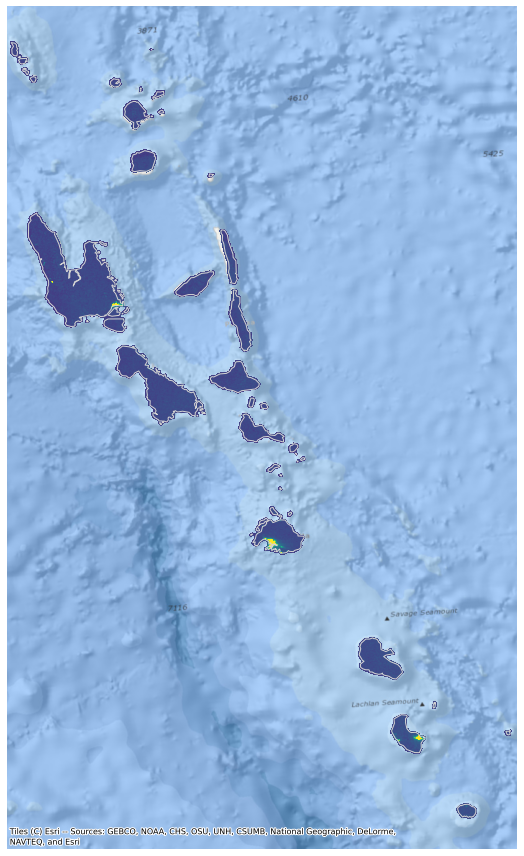

In [168]:
figsize = (12,12)
fig, ax = plt.subplots(1, 1,  figsize = figsize)
ax.set_title("", fontsize=16)
plt.axis('off')

ext = plotting_extent(data_rio)
im = ax.imshow(data, cmap='viridis', vmin=0, vmax=1, extent=ext) # norm=colors.PowerNorm(gamma=0.3) extent=ext
gdf.plot(ax=ax, facecolor='none', edgecolor='lightgray') # markersize=50, alpha=1


# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size="3%", pad=0.25)
# cb = fig.colorbar(im, cax=cax, orientation="vertical")
# cb.set_label('Population at Risk')

ctx.add_basemap(ax, source=ctx.providers.Esri.OceanBasemap, crs=dst_crs, zorder=-10)

plt.tight_layout()
# plt.savefig(os.path.join(out_folder, "Friction_TT_health.png"), dpi=300, bbox_inches='tight', facecolor='white')

In [176]:
out_graph = os.path.join(pac_dir, 'temp_graphs')
if not os.path.exists(out_graph):
    os.mkdir(out_graph)

In [177]:
len(files) == 1

True

In [180]:
row

OBJECTID                                                    225
ISO_A2                                                       TV
WB_ADM0_CO                                                  252
WB_ADM0_NA                                               Tuvalu
Shape_Leng                                               119900
Shape_Area                                              29.9935
ISO3                                                        TUV
UN_m49                                                      798
Region                                      East Asia & Pacific
incomeG                                     Upper middle income
lendingC                                                    IDA
FID_100                                                   22400
SPC                                                           1
geometry      (POLYGON ((586437.4993376806 3293631.860925719...
Name: 27, dtype: object

MemoryError: Unable to allocate 5.65 GiB for an array with shape (3, 37741, 53588) and data type uint8

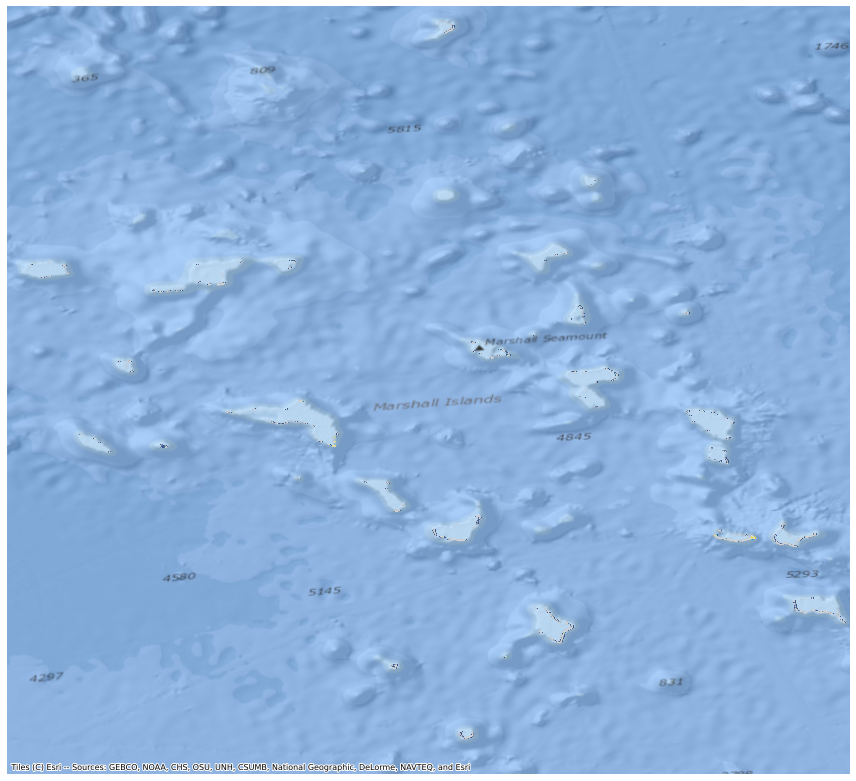

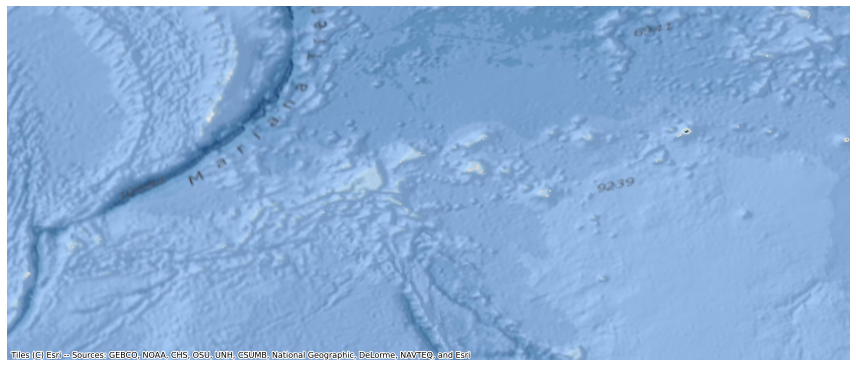

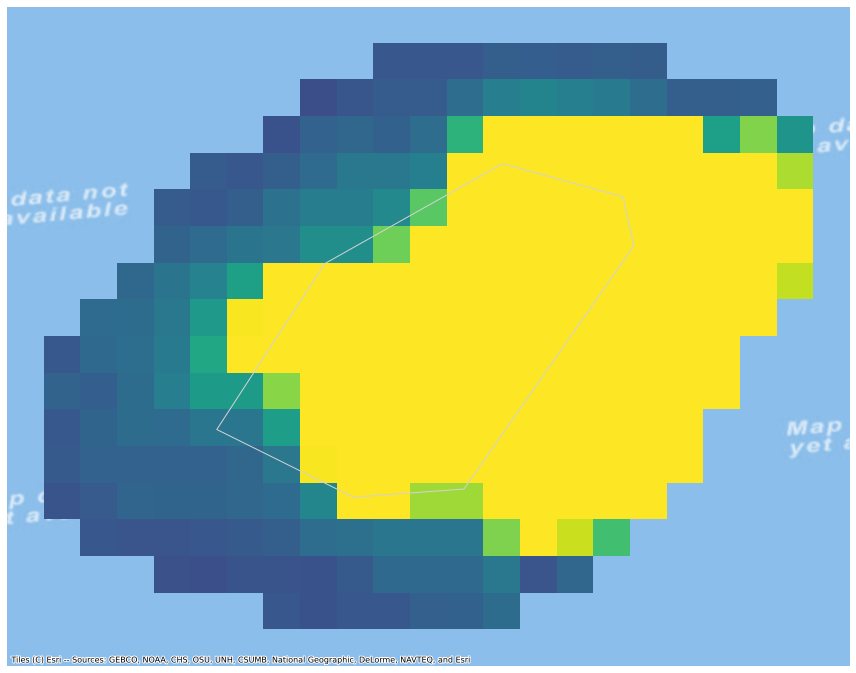

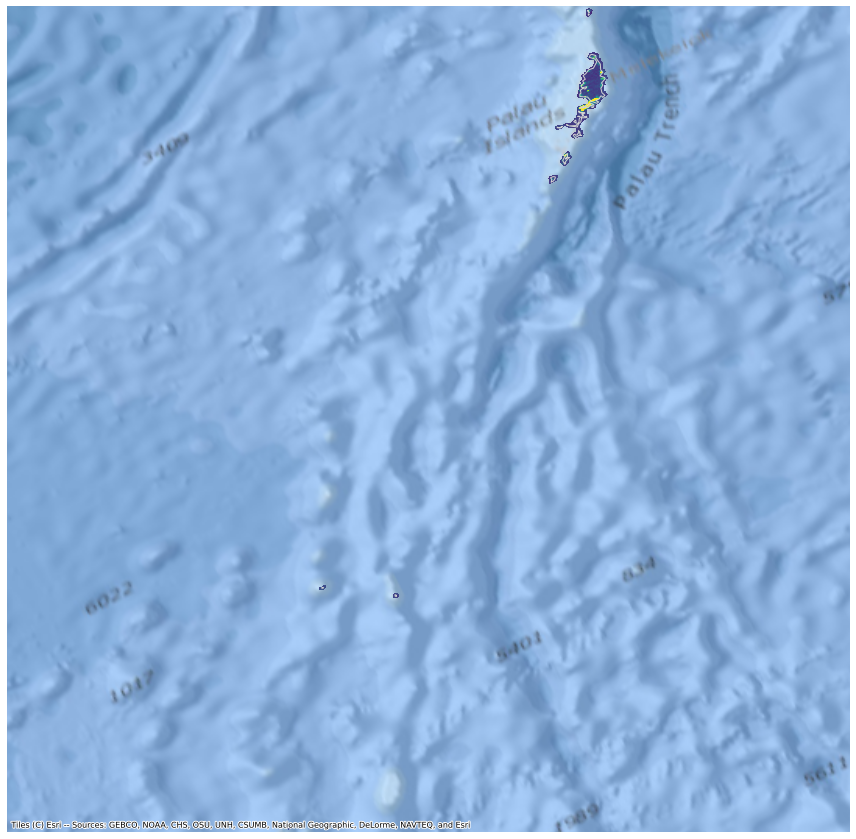

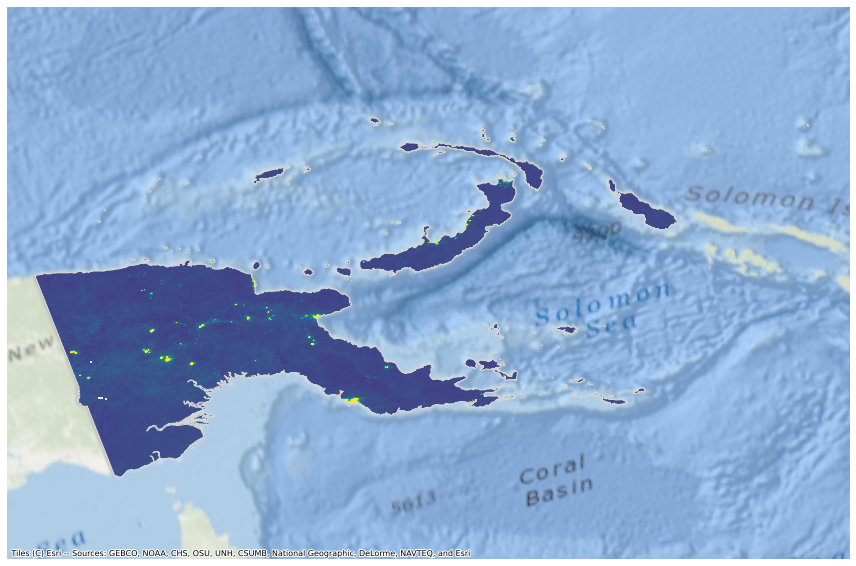

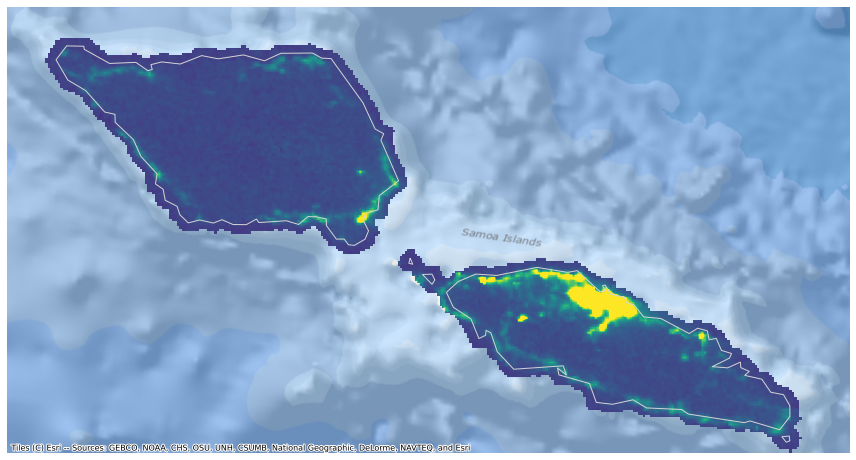

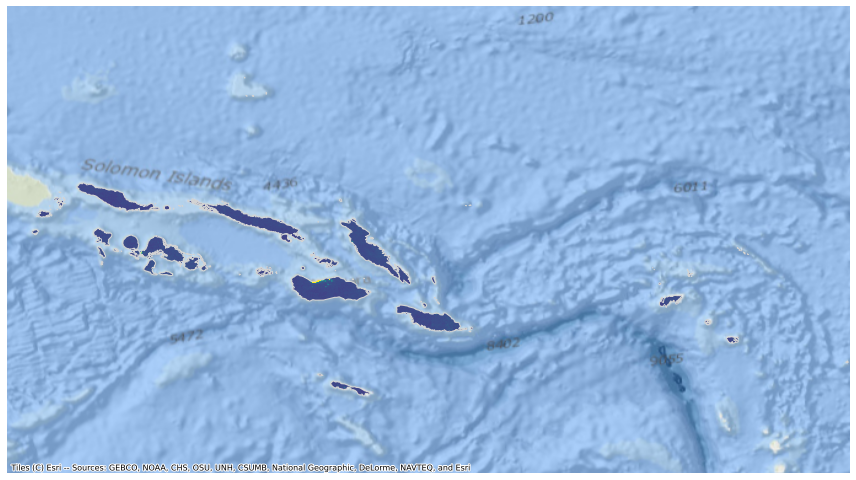

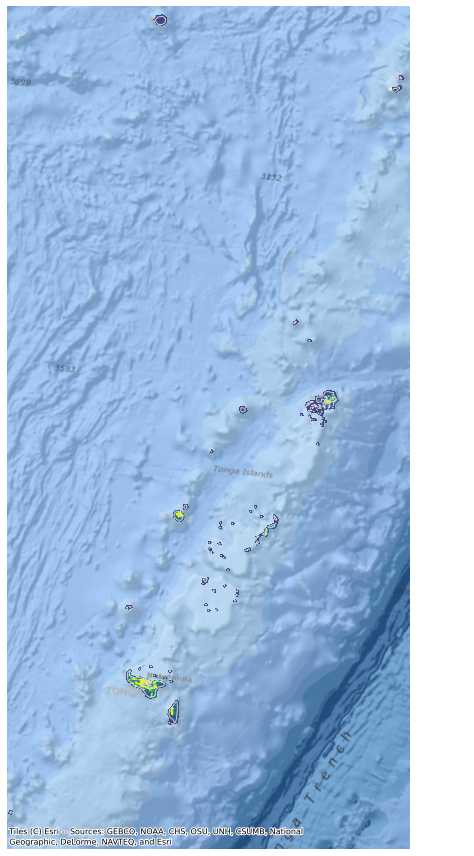

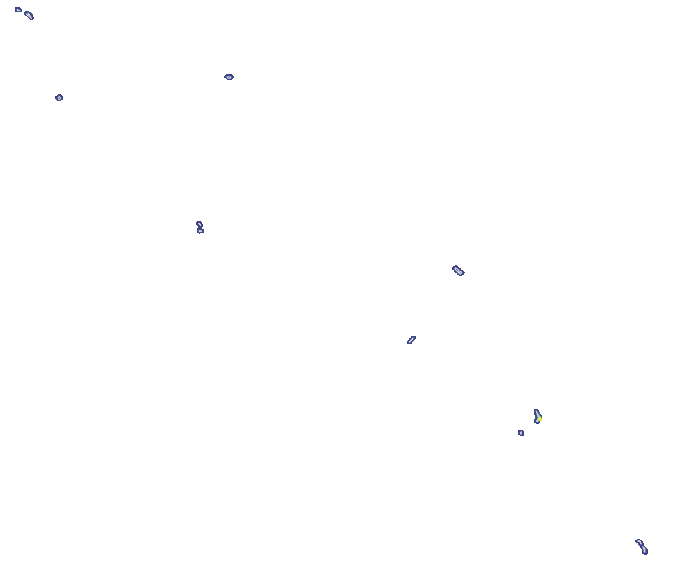

In [179]:
for idx, row in pac.iterrows():
    files = glob(out_proj+f"/{row.ISO3}*.tif")
    if len(files) == 1:
        data_rio = rio.open(files[0])
        data = data_rio.read(1)
        data[data==-1] = np.nan
        gdf = gpd.GeoDataFrame([row], crs=pac.crs)
        gdf = gdf.to_crs(dst_crs)
        
        figsize = (12,12)
        fig, ax = plt.subplots(1, 1,  figsize = figsize)
        ax.set_title("", fontsize=16)
        plt.axis('off')
        
        ext = plotting_extent(data_rio)
        im = ax.imshow(data, cmap='viridis', vmin=0, vmax=1, extent=ext) # norm=colors.PowerNorm(gamma=0.3) extent=ext
        gdf.plot(ax=ax, facecolor='none', edgecolor='lightgray') # markersize=50, alpha=1
        
        ctx.add_basemap(ax, source=ctx.providers.Esri.OceanBasemap, crs=dst_crs, zorder=-10)
        
        plt.tight_layout()
        plt.savefig(os.path.join(out_graph, f"{row.ISO3}.png"), dpi=300, bbox_inches='tight', facecolor='white')
        
    else:
        continue